<h1>Mis notas: NumPy<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Arrays" data-toc-modified-id="Arrays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Arrays</a></span><ul class="toc-item"><li><span><a href="#Creación" data-toc-modified-id="Creación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creación</a></span></li><li><span><a href="#Atributos" data-toc-modified-id="Atributos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Atributos</a></span></li><li><span><a href="#Indexado" data-toc-modified-id="Indexado-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Indexado</a></span></li><li><span><a href="#Slicing" data-toc-modified-id="Slicing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Slicing</a></span></li><li><span><a href="#Sub-arrays" data-toc-modified-id="Sub-arrays-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Sub-arrays</a></span></li><li><span><a href="#Copias-de-arrays" data-toc-modified-id="Copias-de-arrays-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Copias de arrays</a></span></li><li><span><a href="#Reformateo-de-arrays" data-toc-modified-id="Reformateo-de-arrays-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Reformateo de arrays</a></span></li><li><span><a href="#Concatenación-y-división" data-toc-modified-id="Concatenación-y-división-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Concatenación y división</a></span></li></ul></li><li><span><a href="#Funciones-universales-de-NumPy" data-toc-modified-id="Funciones-universales-de-NumPy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Funciones universales de NumPy</a></span><ul class="toc-item"><li><span><a href="#Funciones-aritméticas" data-toc-modified-id="Funciones-aritméticas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Funciones aritméticas</a></span></li><li><span><a href="#Operadores-de-comparación" data-toc-modified-id="Operadores-de-comparación-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Operadores de comparación</a></span></li><li><span><a href="#Operadores-booleanos" data-toc-modified-id="Operadores-booleanos-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Operadores booleanos</a></span></li><li><span><a href="#Funciones-para-arrays-booleanos" data-toc-modified-id="Funciones-para-arrays-booleanos-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Funciones para arrays booleanos</a></span></li><li><span><a href="#Valor-absoluto" data-toc-modified-id="Valor-absoluto-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Valor absoluto</a></span></li><li><span><a href="#Funciones-trigonométricas" data-toc-modified-id="Funciones-trigonométricas-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Funciones trigonométricas</a></span></li><li><span><a href="#Funciones-exponenciales-y-logarítmicas" data-toc-modified-id="Funciones-exponenciales-y-logarítmicas-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Funciones exponenciales y logarítmicas</a></span></li><li><span><a href="#Funciones-especializadas" data-toc-modified-id="Funciones-especializadas-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Funciones especializadas</a></span></li><li><span><a href="#Agregados" data-toc-modified-id="Agregados-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Agregados</a></span></li><li><span><a href="#Producto-tensorial" data-toc-modified-id="Producto-tensorial-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Producto tensorial</a></span></li></ul></li><li><span><a href="#Agregaciones" data-toc-modified-id="Agregaciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Agregaciones</a></span></li><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Broadcasting</a></span></li><li><span><a href="#Indexado-múltiple" data-toc-modified-id="Indexado-múltiple-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Indexado múltiple</a></span></li><li><span><a href="#Ordenación-de-arrays" data-toc-modified-id="Ordenación-de-arrays-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Ordenación de arrays</a></span><ul class="toc-item"><li><span><a href="#Ejemplo:-KNN-(K-Nearest-Neighbours)" data-toc-modified-id="Ejemplo:-KNN-(K-Nearest-Neighbours)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Ejemplo: KNN (K-Nearest Neighbours)</a></span></li></ul></li><li><span><a href="#Arrays-estructurados" data-toc-modified-id="Arrays-estructurados-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Arrays estructurados</a></span></li></ul></div>

**Disclaimer**: Este notebook contiene mis notas sobre NumPy, resumiendo básicamente el [capítulo 2](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/). Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

## Intro

[NumPy](http://www.numpy.org/) (Numerical Python) es una librería para tratar grandes cantidades de datos. Los arrays de NumPy proporcionan almacenamiento y operaciones mucho más eficientes que los arrays estándar de Python cuando los datos empiezan a crecer. Esto convierte a NumPy en parte indispensable dentro del ecosistema de Data Science con Python.

Para poder usar NumPy, simplemente tendremos que importar la librería :)

In [1]:
# NumPy suele importarse con el alias np
import numpy as np

# np?

Igual que un tipo primitivo es más que un simple valor en Python por el tipado dinámico (en realidad se trata de una estructura de C), una lista es más que una simple lista de objetos (pueden albergar todo tipo de objetos simultáneamente). 

Esta flexibilidad tiene un precio, ya que cada objeto en una lista debe incluir información del tipo (entre otras cosas). En el caso de que todos los elementos fueran de un mismo tipo podríamos eliminar la redundancia para ganar en eficiencia de almacenado; esto es precisamente lo que aporta el objeto **array** disponible en Python desde la versión 3.3.

El objeto **ndarray** de NumPy (o array de NumPy a secas), aparte de las ventajas del array, aporta también operaciones eficientes sobre sus datos.

## Arrays

### Creación

Podemos crear arrays a partir de listas, usando el método:

**np.array(`<list>`[, dtype='`<type>`'])**

Para ver la lista de tipos básicos de NumPy: [Doc:  Data types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

In [2]:
# Ejemplo con integer
np.array([1, 2, 3])

array([1, 2, 3])

In [3]:
# Ejemplo con tipos integer y float => upcasting a float!
np.array([1, 2.5, 3])

array([1. , 2.5, 3. ])

También podemos crear arrays sin usar una lista:

In [4]:
# Crear un array vacío (muestra lo que sea que haya en memoria). Útil para inicializarlo.
np.empty(4) 

array([1.11261502e-306, 8.01057147e-307, 2.11392033e-307, 1.60216183e-306])

In [5]:
# Crear un array usando un intervalo, indicando el salto
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [6]:
# Crear un array usando un intervalo, indicando el número de elementos
np.linspace(0, 9, 7) 

array([0. , 1.5, 3. , 4.5, 6. , 7.5, 9. ])

In [7]:
# Crear un array de ceros (float por defecto)
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [8]:
# Especificando el tipo.
np.zeros(5, dtype='int')

array([0, 0, 0, 0, 0])

In [9]:
# Crear una matriz (array bidimensional) de unos. Ojo cómo definimos el tipo (opción b)
np.ones((3, 3), dtype=np.int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [10]:
# Crear una matriz con un valor concreto. Esta vez probamos con un array de 3 dimensiones!
np.full((2, 2, 2), 3.14)

array([[[3.14, 3.14],
        [3.14, 3.14]],

       [[3.14, 3.14],
        [3.14, 3.14]]])

In [11]:
# Crear una matriz de números aleatorios entre 0 y 1
np.random.seed(0) # semilla para reproducibilidad
np.random.random((3, 3))

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

In [12]:
# Crear una matriz de números enteros aleatorios dentro de un intervalo
np.random.randint(0, 10, (3, 3))

array([[1, 6, 7],
       [7, 8, 1],
       [5, 9, 8]])

In [13]:
# Crear una matriz identidad
np.eye(3, 3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Atributos

In [14]:
# Array tridimensional de ejemplo
m = np.random.random((2, 2, 2))
m

array([[[0.0871293 , 0.0202184 ],
        [0.83261985, 0.77815675]],

       [[0.87001215, 0.97861834],
        [0.79915856, 0.46147936]]])

In [15]:
# Atributos comunes
print('m.ndim =', m.ndim)          # dimensiones
print('m.shape =', m.shape)        # tamaño
print('m.size =', m.size)          # nº de elementos
print('m.dtype =', m.dtype)        # tipo
print('m.itemsize =', m.itemsize)  # tamaño de cada elemento, en bytes
print('m.nbytes =', m.nbytes)      # tamaño total

m.ndim = 3
m.shape = (2, 2, 2)
m.size = 8
m.dtype = float64
m.itemsize = 8
m.nbytes = 64


### Indexado

In [16]:
# Array de ejemplo
a = np.arange(0,10)

In [17]:
# Acceso a un elemento de un array
a[0]

0

In [18]:
# Acceso a un elemento por el final
a[-1]

9

In [19]:
# Acceso a un elemento de una matriz
m[0, 0, 0] # equivalente a m[0][0][0]

0.08712929970154071

### Slicing

In [20]:
# [start:stop:step]
a[0:6:2]

array([0, 2, 4])

In [21]:
# [start:stop:step] desde el final
a[3:0:-1] # 9 8 7 6 5 4 [3 2 1] 0

array([3, 2, 1])

In [22]:
# Uno de cada 2 empezando por el segundo elemento
a[1::2]

array([1, 3, 5, 7, 9])

In [23]:
# Arrays multidimensionales
m[:1, :2, :1] 

array([[[0.0871293 ],
        [0.83261985]]])

In [24]:
a_2_10 = np.array([a, a])
a_2_10

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [25]:
# Elementos de la primera columna
print(a_2_10[:,0])

[0 0]


In [26]:
# Elementos de la primera fila
print(a_2_10[0,:]) # Equivalente a aa[0]

[0 1 2 3 4 5 6 7 8 9]


### Sub-arrays
Si creamos un sub-array y modificamos algo del mismo, se modificará el array original. Este comportamiento por defecto nos permite cargar una parte de un dataset para operar sobre los datos, evitando cargar el array completo cuando éste es demasiado grande.

In [27]:
a_2_2 = a_2_10[:2,:2]
a_2_2

array([[0, 1],
       [0, 1]])

In [28]:
a_2_2[:,0] = [10, 10]
a_2_2

array([[10,  1],
       [10,  1]])

In [29]:
a_2_10

array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10,  1,  2,  3,  4,  5,  6,  7,  8,  9]])

### Copias de arrays
Si queremos crear una copia de un array o parte del mismo, tendremos que usar la función **copy()**

In [30]:
a_2_10_copy = a_2_10[:2,:2].copy()
a_2_10_copy

array([[10,  1],
       [10,  1]])

### Reformateo de arrays
Útil para cambiar la forma de un array. Eso sí, el número de elementos tendrá que encajar. Tenemos las funciones **reshape** y **newaxis**

In [31]:
# Paso de un array unidimensional (9) a uno bidimensional (3,3)
np.arange(1, 10).reshape((3, 3)) 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
# Paso de un array unidimensional (9) a uno bidimensional (1,9)
np.arange(1, 10).reshape((1, 9))

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [33]:
# Lo mismo usando newaxis
a[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### Concatenación y división

In [34]:
# Concatenación de arrays unidimensionales
np.concatenate([a, a, a])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
# Concatenación de arrays bidimensionales con mismo tamaño, por filas
np.concatenate([a_2_2, a_2_2])

array([[10,  1],
       [10,  1],
       [10,  1],
       [10,  1]])

In [36]:
# Lo mismo pero por columnas
np.concatenate([a_2_2, a_2_2], axis=1)

array([[10,  1, 10,  1],
       [10,  1, 10,  1]])

In [37]:
# Concatenación para arrays con distintas dimensiones, en vertical
np.vstack([a_2_2, a_2_2[0]])

array([[10,  1],
       [10,  1],
       [10,  1]])

In [38]:
# Concatenación para arrays con distintas dimensiones, en horizontal
np.hstack([a_2_10, a_2_2])

array([[10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1],
       [10,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  1]])

Usaremos **dstack** para concatenar en la tercera dimensión.

Lo contrario a la concatenación es la división, que llevaremos a cabo con **split**, **hsplit**, **vsplit** y **dsplit**

In [39]:
a1, a2, a3, a4 = np.split(a, [1, 3, 6])
print(a1, a2, a3, a4)

[0] [1 2] [3 4 5] [6 7 8 9]


## Funciones universales de NumPy

La clave para que las operaciones sobre arrays de NumPy sean eficientes es usar operaciones **vectorizadas**: ejecutadas sobre un vector, aplicadas sobre cada elemento. Este tipo de operaciones están implementadas en NumPy a través de sus funciones universales (**ufuncs**).

Distinguimos 2 tipos de ufuncs: unarias (una entrada) y binarias (dos).

Cada vez que veamos un bucle que actúa sobre los elementos de un objeto deberemos considerar la opción de sustituirlo por una operación vectorizada.

In [40]:
# Ejemplo con un array y un escalar
b = a/10
b

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [41]:
# Ejemplo con 2 arrays
a + b

array([0. , 1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9])

Podemos mejorar el rendimiento de una operación especificando el array de salida de la misma, en lugar de hacer una asignación; de esa manera nos ahorraremos la creación de un array temporal y la copia de sus elementos al array final

In [42]:
# Ejemplo
y = np.zeros(10)
np.power(2, a[0:5], out=y[::2]) # más eficiente que y[::2] = np.power(2, a[0:5])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


### Funciones aritméticas
Todas las operaciones aritméticas nativas de Python están soportadas por NumPy, y se pueden escribir de dos formas (si usamos la primera, internamente se aplica la de NumPy por haber arrays de por medio):

 * `+` = np.add()
 * `-` = np.subtract()
 * `-` = np.negative()
 * `*` = np.multiply()
 * `/` = np.divide()
 * `//` = np.floor_divide()
 * `**` = np.power()
 * `%` = np.mod()

### Operadores de comparación

Con NumPy tenemos también los operadores de comparación optimizados:

 * `<` = np.less()
 * `>` = np.greater()
 * `<=` = np.less_equal()
 * `>=` = np.greater_equal()
 * `==` = np.equal
 * `!=` = np.not_equal()

Podremos comparar todos los elementos de un array con un escalar, o los elementos de 2 arrays uno a uno. El resultado en ambos casos será un **array booleano**, para los que NumPy también tiene funciones útiles.

In [43]:
a_2_10 > 5

array([[ True, False, False, False, False, False,  True,  True,  True,
         True],
       [ True, False, False, False, False, False,  True,  True,  True,
         True]])

Podemos hacer **enmascarado** para quedarnos con los elementos que cumplen una condición. Para ello usaremos los corchetes igual que en cualquier selección, y pasaremos como parámetro un array booleano resultado de aplicar una condición:

In [44]:
a_2_10[a_2_10 > 5]

array([10,  6,  7,  8,  9, 10,  6,  7,  8,  9])

### Operadores booleanos

NumPy define los siguientes operadores lógicos a nivel de elemento para los arrays booleanos

 * `&` = np.bitwise_and()
 * `|` = np.bitwise_or()
 * `^` : np.bitwise_xor()
 * `~` : np.bitwise_not()
 
Si escribimos **and** y **or** estaremos usando los operadores de Python, a nivel de objeto (con arrays obtendríamos un error).
 
### Funciones para arrays booleanos

 * `np.count_nonzero(x)` : cuenta los True del array # equivale a np.sum(x) porque True = 1 y False = 0.
 * `np.count_nonzero(x, axis=n)` : cuenta los True del array eliminando la dimensión n (0: filas)
 * `np.any(x [,axis=n])` : OR
 * `np.all(x [,axis=n])` : AND

### Valor absoluto

 * `np.absolute(x)` | `np.abs(x)`

In [45]:
# Ejemplo array de enteros
np.absolute(np.arange(-2, 3))

array([2, 1, 0, 1, 2])

In [46]:
# Ejemplo array complejo
np.abs(np.array([1 - 1j, -1 - 2j, 1 + 0j, 0 + 1j]))

array([1.41421356, 2.23606798, 1.        , 1.        ])

### Funciones trigonométricas

 * `np.sin(x)` : seno
 * `np.cos(x)` : coseno
 * `np.tan(x)` : tangente
 
 
 * `np.arcsin(x)` : arco seno
 * `np.arccos(x)` : arco coseno
 * `np.arctan(x)` : arco tangente

### Funciones exponenciales y logarítmicas

 * `np.exp(x)` : e\*\*x
 * `np.expm1(x)` : e\*\*x - 1 # para x ~ 0
 * `np.exp2(x)` : 2\*\*x 
 * `np.power(base, x)` : base\*\*x
 
 
 * `np.log(x)` : ln(x)
 * `np.log1p(x)` : ln(1 + x) # para x ~ 0
 * `np.log10(x)` : log10(x)
 * `np.log2(x)` : log2(x)

### Funciones especializadas
NumPy tiene muchas más funciones para todo tipo de operaciones matemáticas (ver documentación). Y si queremos alguna función más específica, es muy posible que la podamos encontrar ya disponible en el módulo **scipy.special**.

In [47]:
from scipy import special

#Ejemplos
print('special.gamma(b) =', special.gamma(b))
print('special.erf(b) =', special.erf(b))

special.gamma(b) = [       inf 9.5135077  4.59084371 2.99156899 2.21815954 1.77245385
 1.48919225 1.29805533 1.16422971 1.0686287 ]
special.erf(b) = [0.         0.11246292 0.22270259 0.32862676 0.42839236 0.52049988
 0.60385609 0.67780119 0.74210096 0.79690821]


### Agregados
Aparte de poder realizar operaciones de un array con un escalar, o de un array con otro array, podemos usar operaciones entre los propios elementos de un array. Podremos aplicar cualquier ufunc binaria (con dos entradas) usando el método **reduce** y aplicaremos la operación: a los 2 primeros elementos, a su resultado con el tercero, a este resultado con el cuarto, etc.

In [48]:
# Ejemplo con la operación resta
np.subtract.reduce(a)

-45

Si en vez de obtener un resultado final lo que buscamos es obtener un array con todos los resultados parciales, usaremos **accumulate**

In [49]:
np.subtract.accumulate(a)

array([  0,  -1,  -3,  -6, -10, -15, -21, -28, -36, -45], dtype=int32)

### Producto tensorial
Obtendremos una matriz con los resultados de aplicar una operación a todas las combinaciones entre los elementos de un vector y los elementos de otro.

In [50]:
np.multiply.outer(a, a)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

## Agregaciones

NumPy cuenta con funciones agregadoras optimizadas para el estudio estadístico de los datasets:

 * Suma: `x.sum()` = np.sum(x)
 * Máximo: `x.max()` = np.max(x)
 * Mínimo: `x.min()` = np.min(x)
 * Producto: `x.prod()` = np.prod(x)
 * Media: `x.mean()` = np.mean(x)
 * Desviación: `x.std()` = np.std(x)
 * Varianza: `x.var()` = np.var(x)
 * Índice máximo: `x.argmax()` = np.argmax(x)
 * Índice mínimo: `x.argmin()` = np.argmin(x)
 * Mediana: `x.median()` = np.median(x)
 * Percentil: `x.percentile(percentage)` = np.percentile(x, percentage) _# x.percentile(50) = x.median()_
 * OR: `x.any()` = np.any(x)
 * AND: `x.all()` = np.all(x)
 
 Existe una versión segura de cada función (menos de las dos últimas), usando el prefijo `nan`. Dichas funciones ignorarán los valores "faltantes", representados por el valor **NaN**.
 
 NOTA: hay que tener cuidado de poner **np.** delante, o se ejecutarán las funciones de Python.
 
 Estas funciones son aplicables a arrays de cualquier dimensión, con parámetros añadidos:

In [51]:
# Operación aplicada a columnas
a_2_2.mean(axis=0) # axis especifica la dimensión que será eliminada; en este caso las filas

array([10.,  1.])

In [52]:
# Operación aplicada a filas
a_2_2.mean(axis=1)

array([5.5, 5.5])

## Broadcasting
El primer motivo que vimos para vectorizar operaciones era evitar el uso de bucles. El segundo motivo es usar la funcionalidad de broadcasting de NumPy.

Broadcasting es simplemente un conjunto de reglas para aplicar ufuncs binarias sobre arrays de distintos tamaños, donde las operaciones no se pueden aplicar elemento a elemento.

In [53]:
# Ejemplo: suma de un array 2x2 y uno 1x2 
a_2_2 + np.array([2, 1])

array([[12,  2],
       [12,  2]])

En el anterior ejemplo, podemos pensar que el array 1x2 ha sido "difundido" (broadcasted) para conformar una matriz 2x2. 

Las **reglas** del broadcasting en NumPy:

1. Si los 2 arrays difieren en el nº de **dimensiones**, se amplían las del pequeño, añadiendo un 1 a la izquierda
```
a : (3, 1)
b : (3) -> (1, 3)
```
2. Si en alguna dimensión los 2 arrays difieren en el nº de elementos, y el array con menos elementos tiene **exactamente 1** (si es mayor obtendremos un error), se difunde hasta igualar el tamaño del otro.
```
a : (3, 1) -> (3, 3)
b : (1, 3) -> (3, 3)
```

In [54]:
# Ejemplo
a_1_3 = np.array([0, 1, 2])
a_3_1 = np.array([0, 1, 2])[:, np.newaxis]

print(a_1_3)
print("")
print(a_3_1)

a_1_3 + a_3_1

[0 1 2]

[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [55]:
# Ejemplo de error
try:
    a_2_2 + a_1_3
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,2) (3,) 


## Indexado múltiple

El indexado múltiple (o "fancy indexing") no es otra cosa que indexar múltiples elementos de un array usando un array de índices en lugar de un sólo índice escalar.

In [56]:
# Ejemplo: array unidimensional. En este caso podemos pasar una lista en lugar de un array
indices = [0, 2, 4]
a[indices]

array([0, 2, 4])

In [57]:
# Ejemplo: array unidimensional. La salida tendrá el mismo formato que el array de índices
indices = np.array([[0, 1], [8, 9]])
a[indices]

array([[0, 1],
       [8, 9]])

Para arrays bidimensionales, tendremos que especificar 2 parámetros separados por coma (filas, columnas). Podremos usar 2 arrays de índices (siendo aplicable el broadcasting), 1 array y un escalar (para seleccionar sólo una fila o una columna), 1 array y slicing (para seleccionar un rango), o 1 array y 1 array booleano (enmascarado).

In [58]:
# Ejemplo con 2 arrays de entrada
a_4_4 = np.arange(16).reshape(4, 4)
filas = [0, 1, 2, 3]
columnas = [0, 1, 2, 3]
a_4_4[filas, columnas]

array([ 0,  5, 10, 15])

In [59]:
# Ejemplo con broadcasting. La salida tiene la misma forma que el broadcasting de los índices.
filas = [0, 1, 2, 3]
columnas = np.array([0, 1])[:, np.newaxis]
a_4_4[filas, columnas]

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13]])

In [60]:
# Ejemplo con masking
filas = np.array([0, 1, 2, 3])[:, np.newaxis]
columnas = np.array([1, 1, 0, 0], dtype=np.bool)
a_4_4[filas, columnas]

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

El indexado múltiple se puede usar tanto para obtener parte de un array, como para modificarlo por asignación.

In [61]:
# Ejemplo con índices repetidos
a_copy = np.copy(a)
indices = [0, 1, 0, 1]
a_copy[indices] += 10
a_copy

array([10, 11,  2,  3,  4,  5,  6,  7,  8,  9])

Si lo que quisiéramos en realidad es que se aplicara la suma al elemento tantas veces como aparezca en los índices podemos lograrlo usando el método `at()` de las ufuncs:

In [62]:
np.add.at(a_copy, [0, 1, 0, 1], 1)
a_copy

array([12, 13,  2,  3,  4,  5,  6,  7,  8,  9])

## Ordenación de arrays

NumPy ofrece funciones para ordenar los elementos de un array de forma mucho más eficiente que las funciones `sort` y `sorted` de Python para listas. Las funciones de NumPy son:

 * `np.sort(x [, index=i])` : devuelve una versión ordenada del array de entrada, usando un algoritmo quicksort O[N logN] por defecto (también disponibles mergesort y heapsort).
 * `np.argsort(x [, index=i])` : devuelve un array con los índices de los elementos ordenados
 * `np.partition(x, k [, index=i])` : devuelve los k primeros valores agrupados a la izquierda (sin orden), y el resto a la derecha (sin orden)
 * `np.argpartition(x, k [, index=i])` : devuelve un array con los índices de los elementos agrupados

In [63]:
# Ejemplo de ordenación
np.sort(np.array([3,7,6,9,5,1,2,4,0]))

array([0, 1, 2, 3, 4, 5, 6, 7, 9])

In [64]:
# Ejemplo de ordenación con 2 dimensiones
r = np.random.randint(0, 10, (4, 4))
print(r)
np.sort(r, axis=0) # 0: por columna

[[3 3 7 0]
 [1 9 9 0]
 [4 7 3 2]
 [7 2 0 0]]


array([[1, 2, 0, 0],
       [3, 3, 3, 0],
       [4, 7, 7, 0],
       [7, 9, 9, 2]])

In [65]:
# Ejemplo de agrupación
np.partition(np.array([3,7,6,9,5,1,2,4,0]), 3)

array([1, 0, 2, 3, 7, 9, 6, 4, 5])

### Ejemplo: KNN (K-Nearest Neighbours)

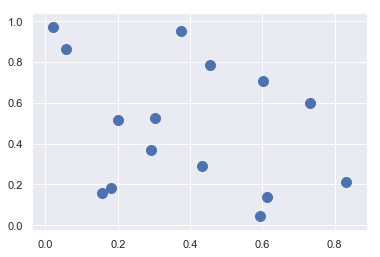

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # styling

# Generamos 15 muestras de puntos bidimensionales
np.random.seed(42)
data = np.random.rand(15, 2)

# Los pintamos
plt.scatter(data[:, 0], data[:, 1], s=100);

In [67]:
# Calculamos la distancia cuadrática de cada par de puntos como la suma de los cuadrados de las distancias.
# Primero calculamos, para cada par de puntos, la diferencia entre sus coordenadas. Usamos broadcasting!
differences = (data[:, np.newaxis, :] - data[np.newaxis, :, :])

# Comprobamos la pinta del array
differences.shape

(15, 15, 2)

In [68]:
square_dist = np.sum(differences ** 2, axis=-1) # sobre el último eje

# Comprobamos la diagonal!
square_dist.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

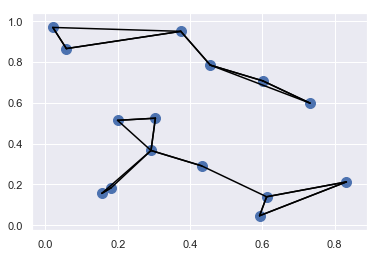

In [69]:
# Obtenemos los 2 vecinos más cercanos usando argpartition
k = 2 # Queremos 2 vecinos, así que necesitaremos 3 puntos (el primero es uno mismo!)
nearest_partition = np.argpartition(square_dist, k+1, axis=1)

# Dibujamos los puntos y las líneas que unen cada punto con sus k vecinos más cercanos
plt.scatter(data[:, 0], data[:, 1], s=100)

for i in range(data.shape[0]):
    for j in nearest_partition[i, :k+1]:
        plt.plot(*zip(data[j], data[i]), color='black')

## Arrays estructurados

NumPy soporta arrays para datasets heterogéneos, aunque para ese tipo de datos es muy recomendable usar los Dataframes de pandas :)